## Ensemple Learning

- ensemble learning is an approach to machine learning which tries to obtain better predictive performance by combining the predictions from multiple machine learning models. works of the principle of aggregating the predictions of a group.

examples include:
- random forest classifier
- the 3 main classes/methods of ensemble learning include:
  1. **bagging**
  2. **stacking**
  3. **boosting**

- ***Bagging***:- involves fitting many decision trees on different samples og the same data set and then averaging the results in predictions.
- ***stacking***:- fit many different model types on the same data and use another model to learn how to best combine the predictions.
- ***boosting***:- involves adding ensemble members sequentially that correct the predictions made by prior models and outputs of waiting average, often predictions.

 the above are aggregate techniques built to reduce variance. 

## Random forest: rule-based Algorithm

- Decision trees, though known as simple algorithm they are also referred to greedy algorithm. this is because they focus on optimizing for the node splits at hand, rather than taking into account how the split impacts the entire tree often resulting into overfitting. An overfit tree is highly optimized in predicting the values in the training data set which results into a learning model with a *high variance*.

**random forests and overfitting**

- overfitting is when a model is nolonger as accurate as we want it to be on thr data. 

Advantages:
- it's a data robust algorithim able to handle different kinds of data
- it does not require the data to be pre-processed
- it combines the results of different decision trees thereby optimizing the local splits but instead of exploring all possible splits of each feature in the dataset, it picks a subset of hose features.
- the above helps reduce the number of outcomes the algorithm needs to to evaluate at each split and it makes each trained tree different. 

## extra_trees algorithm

is an ensemble learning algorithm.

it works by creating a large number of unprunned decision trees from the training set. they are often used for both regression tasks as well as classification tasks.

## Let's train a voting classifier 

this involves  aggregating the predictions of 3 or more classifiers and predict the class that gets the most votes. This majority-vote classifier is called a **hard voting classifier**

 this voting classifier often achieves a higher accuracy than the best classifier in the ensemble. In fact, even if each classifier is a weak learner (meaning it does only slightly better than random guessing), the ensemble can still be a strong learner (achieving high accuracy), provided there are a sufficient number of weak learners and they are sufficiently diverse.

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

#using the moons dataset
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# load the data



log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

Let's look at each classifier's accuracy on the test set:


In [11]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.888
SVC 0.896
VotingClassifier 0.896


**From the output, the voting classifier outperforms all the individual classifiers**

If all classifiers are able to estimate class probabilities (i.e., they all have a `predict_proba() method), then you can tell Scikit-Learn to predict the class with the highest class probability, averaged over all the individual classifiers. This is called **soft voting**.

soft voting often achieves higher performance than hard voting because it gives more weight to highly confident votes
 an example is below:


In [12]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [13]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


### Bagging and Pasting
bagging:- samplibg is performed with replacement while pasting is when sampling is performed without replacement. 

- both allow trainig instamces to be sampled across multiple predictors but only bagging allows the training instances to sampled several times for the same predictor.

let's look at an example:

The following code trains an ensemble of 500 Decision Tree classifiers:5 each is trained on 100 training instances randomly sampled from the training set with replacement (this is an example of bagging, but if you want to use pasting instead, just set `bootstrap=False`). The `n_jobs` parameter tells Scikit-Learn the number of CPU cores to use for training and predictions (–1 tells Scikit-Learn to use all available cores):


In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [15]:
#print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [15]:
# print accuracy score of a decision tree classifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [25]:
# Let's visualize
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

import numpy as np

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

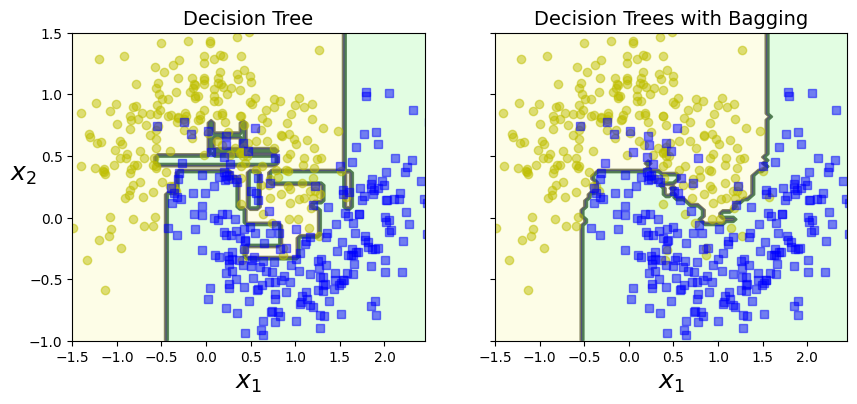

In [27]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
#save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()